### **Neural Network classification with PyTorch**

#### **1. Make classification and get it ready**

In [1]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples 
n_samples = 1000

# Standard deviation of Gaussian noise
noise = 0.03

# Reproducibility 
RANDOM_SEED = 42

# Create circles 
X, y = make_circles(n_samples = n_samples,
                    noise = noise,
                    random_state=RANDOM_SEED)

##### Why use noise? (Note)

* To simulate **realistic** data.
* To test how well your model performs with **imperfect inputs**.
* To prevent **overfitting** in training (model memorizing perfect patterns).



In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f'First 5 samples of X: \n {X[:5]}')
print(f'First 5 samples of y: \n {y[:5]}')

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [7]:
# Make DataFrame of circle data
import pandas as pd 
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

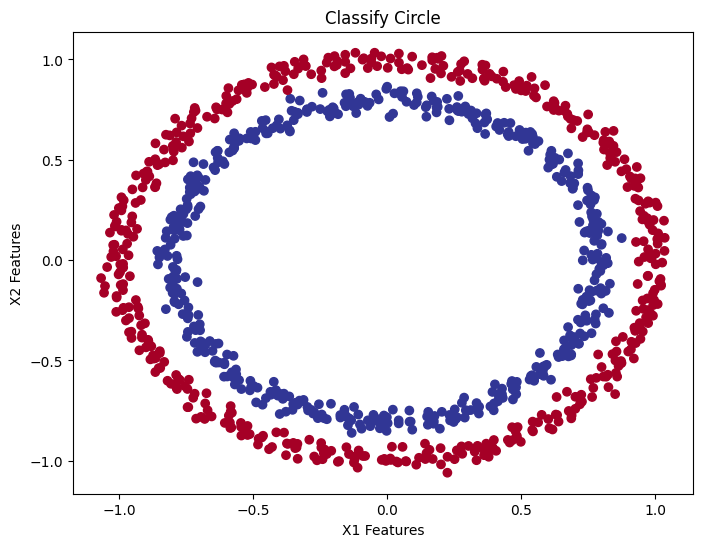

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c = y, # Must need to understand 
            cmap = 'RdYlBu') # Must need to understand
plt.xlabel('X1 Features')
plt.ylabel('X2 Features')
plt.title('Classify Circle')
plt.show()


##### **1.1 Check input features and output label shapes** 

In [18]:
X_sample = X[0]
y_sample = y[0]
print(f'Values for one sample of X: {X_sample}\n')
print(f'Values for one sample of y: {y_sample}\n')
print(f'Shapes for one sample of X: {X_sample.shape}\n')
print(f'Dimension for one sample of X: {X_sample.ndim}\n')
print(f'Shapes for one sample of y: {y_sample.shape}\n')
print(f'Dimension for one sample of X: {X_sample.ndim}\n')

Values for one sample of X: [0.75424625 0.23148074]

Values for one sample of y: 1

Shapes for one sample of X: (2,)

Dimension for one sample of X: 1

Shapes for one sample of y: ()

Dimension for one sample of X: 1



##### **1.2 Turn data into tensors and create train test splits** 

In [19]:
import torch
torch.__version__

'2.6.0+cpu'

In [20]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [21]:
# Turn numpy data into tensors 
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [22]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [23]:
# Split data into training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size = 0.2,
    random_state= 42
)

In [24]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [25]:
n_samples

1000

#### **1. Building a model**
let's build a model to classify our blue and red dots.
To do so, we want to 

1. Setup device agonistic code
2. Construct a model (By subclassing nn.Module)
3. Define a loss function and optimizer 
4. Create a loss function 


In [26]:
# Import PyTorch and nn
import torch 
from torch import nn

# Make device agnostic code 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device 

'cpu'

In [ ]:
from sklearn import datasets

# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        # calling the __init__() method of nn.Module 
        super().__init__() # please check extras for explanation
        # 2. Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1)
    
    # 3. Define a forward() method that outlines the forward pass

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device 
model_0 = CircleModelV0.to(device)
model_0

input x  
   ↓  
layer_1 (e.g., Linear)  
   ↓  
layer_2 (e.g., Linear again)  
   ↓  
output (predictions)
